Imports

In [462]:
##Imports 

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.utils import shuffle

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [463]:
columns = pd.Index(["Name","Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Survived"], name='cols')
data = pd.DataFrame(pd.read_csv("data/train.csv"), columns = columns)
print(data.size)

8019


In [464]:
data

cols,Name,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,"Braund, Mr. Owen Harris",3,male,22.0,1,0,7.2500,S,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,71.2833,C,1
2,"Heikkinen, Miss. Laina",3,female,26.0,0,0,7.9250,S,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,53.1000,S,1
4,"Allen, Mr. William Henry",3,male,35.0,0,0,8.0500,S,0
5,"Moran, Mr. James",3,male,NaN,0,0,8.4583,Q,0
6,"McCarthy, Mr. Timothy J",1,male,54.0,0,0,51.8625,S,0
7,"Palsson, Master. Gosta Leonard",3,male,2.0,3,1,21.0750,S,0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",3,female,27.0,0,2,11.1333,S,1
9,"Nasser, Mrs. Nicholas (Adele Achem)",2,female,14.0,1,0,30.0708,C,1


In [465]:
data["Title"] = data.Name.str.extract(' ([A-Za-z]+)\.')
data.head()

cols,Name,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title
0,"Braund, Mr. Owen Harris",3,male,22.0,1,0,7.2500,S,0,Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,71.2833,C,1,Mrs
2,"Heikkinen, Miss. Laina",3,female,26.0,0,0,7.9250,S,1,Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,53.1000,S,1,Mrs
4,"Allen, Mr. William Henry",3,male,35.0,0,0,8.0500,S,0,Mr


In [466]:
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

# Map the remaining title feature to values 
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
data['Title'] = data['Title'].map(title_mapping)
data['Title'] = data['Title'].fillna(0)

data = data.drop("Name", axis=1)

In [467]:
data.head()

cols,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title
0,3,male,22.0,1,0,7.2500,S,0,1
1,1,female,38.0,1,0,71.2833,C,1,3
2,3,female,26.0,0,0,7.9250,S,1,2
3,1,female,35.0,1,0,53.1000,S,1,3
4,3,male,35.0,0,0,8.0500,S,0,1


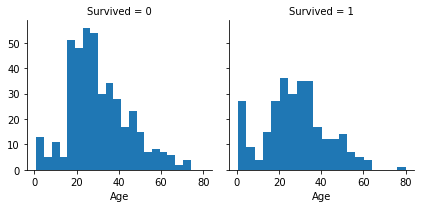

In [468]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Age', bins=20)


In [469]:
# Next, we're going to create Age Bands

data['AgeBand'] = pd.cut(data['Age'], 5)
data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

cols,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [470]:
# Find the mean of the Age, then replace
total = 0
m = 0

for index, rows in data.iterrows():
	if (rows.isnull().values.any()) == False:
		total += rows["Age"]
		m += 1
total / m

29.64209269662921

In [471]:
# Replace the ranges with ordinal values

data = data.fillna(value={"Age": 30})

data.loc[ data['Age'] <= 16, 'Age'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
data.loc[ data['Age'] > 64, 'Age']
data["Age"] = data["Age"].astype(int)

data = data.drop("AgeBand", axis=1)
data.head()

cols,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title
0,3,male,1,1,0,7.2500,S,0,1
1,1,female,2,1,0,71.2833,C,1,3
2,3,female,1,0,0,7.9250,S,1,2
3,1,female,2,1,0,53.1000,S,1,3
4,3,male,2,0,0,8.0500,S,0,1


In [472]:
data.head()
data.tail()

cols,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title
886,2,male,1,0,0,13.00,S,0,5
887,1,female,1,0,0,30.00,S,1,2
888,3,female,1,1,2,23.45,S,0,2
889,1,male,1,0,0,30.00,C,1,1
890,3,male,1,0,0,7.75,Q,0,1


In [473]:
data['FareBand'] = pd.qcut(data['Fare'], 4)
data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

cols,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [474]:
# We band Fare

data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
data.loc[ data['Fare'] > 31, 'Fare'] = 3
data['Fare'] = data['Fare'].astype(int)

data = data.drop("FareBand", axis=1)

In [475]:

# Replace female with binary
data = data.replace("female", 1)
data = data.replace("male", 0)

# Perform similar replacement on Embark
data = data.replace("Q", 0)
data = data.replace("S", 1)
data = data.replace("C", 2)

In [476]:
# Fill the age with the average
# Also fill some stray embarked Na
data = data.fillna(value={"Embarked": 0})
    
data.head()

cols,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title
0,3,0,1,1,0,0,1.0,0,1
1,1,1,2,1,0,3,2.0,1,3
2,3,1,1,0,0,1,1.0,1,2
3,1,1,2,1,0,3,1.0,1,3
4,3,0,2,0,0,1,1.0,0,1


We will combine Sibling count and Parch into one family size feature

In [477]:
data["FamilySize"] = data["SibSp"] + data["Parch"] + 1
data.head()

cols,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title,FamilySize
0,3,0,1,1,0,0,1.0,0,1,2
1,1,1,2,1,0,3,2.0,1,3,2
2,3,1,1,0,0,1,1.0,1,2,1
3,1,1,2,1,0,3,1.0,1,3,2
4,3,0,2,0,0,1,1.0,0,1,1


In [478]:
# Create a new "IsAlone", as it seems to be a very good indicator if
# someone survived or not

data["IsAlone"] = 0
data.loc[data["FamilySize"] == 1, "IsAlone"] = 1
data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

cols,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [479]:
# IsAlone seems to be a very good predictor, so we'll just drop family size
# and the original features associated with it

data = data.drop(["Parch", "SibSp", "FamilySize"], axis=1)
data.head()

cols,Pclass,Sex,Age,Fare,Embarked,Survived,Title,IsAlone
0,3,0,1,0,1.0,0,1,0
1,1,1,2,3,2.0,1,3,0
2,3,1,1,1,1.0,1,2,1
3,1,1,2,3,1.0,1,3,0
4,3,0,2,1,1.0,0,1,1


In [480]:
trainY = pd.DataFrame(data["Survived"])
trainX = data.drop("Survived", axis=1)

trainX.head()

cols,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,3,0,1,0,1.0,1,0
1,1,1,2,3,2.0,3,0
2,3,1,1,1,1.0,2,1
3,1,1,2,3,1.0,3,0
4,3,0,2,1,1.0,1,1


In [481]:
trainY.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [482]:
columns = pd.Index(["PassengerId", "Name", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"], name='cols')

data = pd.DataFrame(pd.read_csv('data/test.csv'), columns = columns)

# Create the title feature 
data["Title"] = data.Name.str.extract(' ([A-Za-z]+)\.')

data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

# Map the remaining title feature to values 
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
data['Title'] = data['Title'].map(title_mapping)
data['Title'] = data['Title'].fillna(0)

# Replace the ranges with ordinal values

data = data.fillna(value={"Age": 30})

data.loc[ data['Age'] <= 16, 'Age'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
data.loc[ data['Age'] > 64, 'Age']

# Banding Fare

data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
data.loc[ data['Fare'] > 31, 'Fare'] = 3
data = data.fillna(value={"Fare": 0})
data['Fare'] = data['Fare'].astype(int)

# Create isAlone feature
data["FamilySize"] = data["SibSp"] + data["Parch"] + 1
data["IsAlone"] = 0
data.loc[data["FamilySize"] == 1, "IsAlone"] = 1
data = data.drop(["Parch", "SibSp", "FamilySize"], axis=1)
data.head()


data = data.drop("Name", axis=1)
	
# Replace female with binary
data = data.replace("female", 1)
data = data.replace("male", 0)

# Perform similar replacement on Embark
data = data.replace("Q", 0)
data = data.replace("S", 1)
data = data.replace("C", 2)

data = data.fillna(value={"Embarked": 0})

testX = data.drop("PassengerId", axis=1)
passIDs = data["PassengerId"]

trainX.head()

cols,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,3,0,1,0,1.0,1,0
1,1,1,2,3,2.0,3,0
2,3,1,1,1,1.0,2,1
3,1,1,2,3,1.0,3,0
4,3,0,2,1,1.0,1,1


In [483]:

# Train the mode
model = RandomForestClassifier(n_estimators=1000, n_jobs=1)
model.fit(trainX, trainY.values.ravel())


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [484]:
# Make new predictions
testY = model.predict(testX)

In [485]:
submission = pd.DataFrame({"PassengerId": passIDs, "Survived": testY})
submission.to_csv("results.csv")